# Project: Wrangling and Analyze Data

In [191]:
# Import necessary python libraries.
import pandas as pd
import requests 
import os
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjust the comfiguretion of the plots we will create.

## Data Gathering

1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [192]:
# Read the twitter archive file
twitter_archive = pd.read_csv('data/twitter-archive-enhanced.csv')

In [193]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [195]:
# Save file to download folder
folder_name = 'data'

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open(os.path.join(folder_name, url.split('/')[-1]), 'wb') as file:
    file.write(response.content)

In [197]:
# Read the image prediction file
image_prediction = pd.read_csv('data/image-predictions.tsv', sep='\t')
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [198]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            #Comment out to avoid error display
            #tweet = api.get_status(tweet_id, tweet_mode='extended') #Comment out to avoid error display
            print("Success")
            #json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Success
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590

Success
462: 817536400337801217
Success
463: 817502432452313088
Success
464: 817423860136083457
Success
465: 817415592588222464
Success
466: 817181837579653120
Success
467: 817171292965273600
Success
468: 817120970343411712
Success
469: 817056546584727552
Success
470: 816829038950027264
Success
471: 816816676327063552
Success
472: 816697700272001025
Success
473: 816450570814898180
Success
474: 816336735214911488
Success
475: 816091915477250048
Success
476: 816062466425819140
Success
477: 816014286006976512
Success
478: 815990720817401858
Success
479: 815966073409433600
Success
480: 815745968457060357
Success
481: 815736392542261248
Success
482: 815639385530101762
Success
483: 815390420867969024
Success
484: 814986499976527872
Success
485: 814638523311648768
Success
486: 814578408554463233
Success
487: 814530161257443328
Success
488: 814153002265309185
Success
489: 813944609378369540
Success
490: 813910438903693312
Success
491: 813812741911748608
Success
492: 813800681631023104
Success


924: 755955933503782912
Success
925: 755206590534418437
Success
926: 755110668769038337
Success
927: 754874841593970688
Success
928: 754856583969079297
Success
929: 754747087846248448
Success
930: 754482103782404096
Success
931: 754449512966619136
Success
932: 754120377874386944
Success
933: 754011816964026368
Success
934: 753655901052166144
Success
935: 753420520834629632
Success
936: 753398408988139520
Success
937: 753375668877008896
Success
938: 753298634498793472
Success
939: 753294487569522689
Success
940: 753039830821511168
Success
941: 753026973505581056
Success
942: 752932432744185856
Success
943: 752917284578922496
Success
944: 752701944171524096
Success
945: 752682090207055872
Success
946: 752660715232722944
Success
947: 752568224206688256
Success
948: 752519690950500352
Success
949: 752334515931054080
Success
950: 752309394570878976
Success
951: 752173152931807232
Success
952: 751950017322246144
Success
953: 751937170840121344
Success
954: 751830394383790080
Success
955: 751

1336: 705239209544720384
Success
1337: 705223444686888960
Success
1338: 705102439679201280
Success
1339: 705066031337840642
Success
1340: 704871453724954624
Success
1341: 704859558691414016
Success
1342: 704847917308362754
Success
1343: 704819833553219584
Success
1344: 704761120771465216
Success
1345: 704499785726889984
Success
1346: 704491224099647488
Success
1347: 704480331685040129
Success
1348: 704364645503647744
Success
1349: 704347321748819968
Success
1350: 704134088924532736
Success
1351: 704113298707505153
Success
1352: 704054845121142784
Success
1353: 703774238772166656
Success
1354: 703769065844768768
Success
1355: 703631701117943808
Success
1356: 703611486317502464
Success
1357: 703425003149250560
Success
1358: 703407252292673536
Success
1359: 703382836347330562
Success
1360: 703356393781329922
Success
1361: 703268521220972544
Success
1362: 703079050210877440
Success
1363: 703041949650034688
Success
1364: 702932127499816960
Success
1365: 702899151802126337
Success
1366: 7026

Success
1793: 677334615166730240
Success
1794: 677331501395156992
Success
1795: 677328882937298944
Success
1796: 677314812125323265
Success
1797: 677301033169788928
Success
1798: 677269281705472000
Success
1799: 677228873407442944
Success
1800: 677187300187611136
Success
1801: 676975532580409345
Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
1810: 676864501615042560
Success
1811: 676821958043033607
Success
1812: 676819651066732545
Success
1813: 676811746707918848
Success
1814: 676776431406465024
Success
1815: 676617503762681856
Success
1816: 676613908052996102
Success
1817: 676606785097199616
Success
1818: 676603393314578432
Success
1819: 676593408224403456
Success
1820: 676590572941893632
Success
1821: 676588346097852417
Success
1822: 676582956622721024
Success
18

In [199]:
# Create a dataframe from the tweet-json file
folder_name = 'data'
df_list = []

all_tweet = [json.loads(line) for line in open(os.path.join(folder_name, 'tweet-json.txt'))]
for tweet in all_tweet:
    tweet_id = tweet['id']
    text = tweet['full_text']
    only_url = text[text.find('https'):] 
    retweet_count = tweet['retweet_count']
    favorite_count = tweet['favorite_count']
    followers_count = tweet['user']['followers_count']
    friends_count = tweet['user']['friends_count']
    whole_source = tweet['source']
    source=whole_source[whole_source.find('rel="nofollow">') + 15:-4]
    retweeted = tweet.get('retweeted', 'This is a retweet')
    if retweeted == False:
        retweeted_status = 'Original tweet'
    else:
        retweeted_status = retweeted
    

    df_list.append({'tweet_id': tweet_id,
                    'url': only_url,
                    'retweet_count': retweet_count,
                    'favorite_count': favorite_count,
                    'followers_count': followers_count,
                    'friends_count': friends_count,
                    'source': source,
                    'retweeted_status': retweeted_status})
        
tweet_json = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count', 'followers_count',
                                              'friends_count', 'source', 'retweeted_status', 'url'])

## Assessing Data

In [200]:
# increasing the column width so that the whole text in the 'text' column is visible
pd.set_option('display.max_colwidth', None)

* ##### `Visual assessment`: 
Each piece of gathered data is displayed for visual assessment purposes.

In [201]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None


In [202]:
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [203]:
tweet_json

,tweet_id,retweet_count,favorite_count,followers_count,friends_count,source,retweeted_status,url
0,892420643555336193,8853,39467,3200889,104,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,6514,33819,3200889,104,Twitter for iPhone,Original tweet,https://t.co/0Xxu71qeIV
2,891815181378084864,4328,25461,3200889,104,Twitter for iPhone,Original tweet,https://t.co/wUnZnhtVJB
3,891689557279858688,8964,42908,3200889,104,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,9774,41048,3200889,104,Twitter for iPhone,Original tweet,https://t.co/AtUZn91f7f
...,...,...,...,...,...,...,...,...
2349,666049248165822465,41,111,3201018,104,Twitter for iPhone,Original tweet,https://t.co/4B7cOc1EDq
2350,666044226329800704,147,311,3201018,104,Twitter for iPhone,Original tweet,https://t.co/DWnyCjf2mx
2351,666033412701032449,47,128,3201018,104,Twitter for iPhone,Original tweet,https://t.co/y671yMhoiR
2352,666029285002620928,48,132,3201018,104,Twitter for iPhone,Original tweet,https://t.co/r7mOb2m0UI


* #### `Programmatic assessment`: 
Pandas' functions and/or methods are used to assess the data.

In [204]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [205]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [206]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          2354 non-null   int64 
 1   retweet_count     2354 non-null   int64 
 2   favorite_count    2354 non-null   int64 
 3   followers_count   2354 non-null   int64 
 4   friends_count     2354 non-null   int64 
 5   source            2354 non-null   object
 6   retweeted_status  2354 non-null   object
 7   url               2354 non-null   object
dtypes: int64(5), object(3)
memory usage: 147.2+ KB


### Twitter Archive Assessment

In [207]:
# The value count of rating numerator
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [208]:
# Print the text of rating numerator above 100 and equal to 0.
numerator_above_100_list = [420, 165, 144, 182, 143, 666, 960, 1776, 121, 204, 0]

def disp_text(rating_num):
    """
    fucnton to display text.

    :rating_num: the rating number to display
    :return: display the text
    """ 
    text = twitter_archive.loc[twitter_archive.rating_numerator == rating_num, 'text']
    print(text)

    
for i in numerator_above_100_list:
    disp_text(i)

188     @dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research
2074       After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY
Name: text, dtype: object
902    Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
Name: text, dtype: object
1779    IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq
Name: text, dtype: object
290    @markhoppus 182/10
Name: text, dtype: object
1634    Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3
Name: text, dtype: object
189    @s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10
Name: text, dtype: object
313    @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
Name: text, dtype: object
979    This is Atticus. He's quite simply America af. 1

In [209]:
# Print the whole text to verify numerators
text_index_list = [188, 189, 290, 313, 902, 1779, 1634, 979, 1635, 1120, 315, 1016]

# Funcion to print the full text of an index.
full_text = lambda i: twitter_archive['text'][i]

for i in text_index_list:
    print(full_text(i))

@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research
@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10
@markhoppus 182/10
@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq
Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3
This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh
Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55
Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
When you're so blinded by your systematic 

In [210]:
# The value count of rating denominator
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [211]:
# Print the text of rating denominator above 100 and equal to 0.
denominator_above_100_list = [110, 120, 130, 150, 170, 0]

def disp_text(rating_num):
    """
    fucnton to display text.

    :rating_num: the rating number to display
    :return: display the text
    """ 
    text = twitter_archive.loc[twitter_archive.rating_denominator == rating_num, 'text']
    print(text)

    
for i in denominator_above_100_list:
    disp_text(i)

1635    Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55
Name: text, dtype: object
1779    IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq
Name: text, dtype: object
1634    Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3
Name: text, dtype: object
902    Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
Name: text, dtype: object
1120    Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
Name: text, dtype: object
313    @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
Name: text, dtype: object


In [212]:
# Print the whole text to verify denominators
text_index_list = [1635, 1779, 1634, 902, 1120, 313]

# Funcion to print the full text of an index.
full_text = lambda i: twitter_archive['text'][i]

for i in text_index_list:
    print(full_text(i))

Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55
IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq
Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3
Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho


In [213]:
twitter_archive.name.value_counts()

None        745
a            55
Charlie      12
Cooper       11
Oliver       11
           ... 
Ester         1
Mauve         1
Chadrick      1
Saydee        1
Marlee        1
Name: name, Length: 957, dtype: int64

In [214]:
# Check for duplicate
twitter_archive[twitter_archive.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Image prediction Assessment

In [215]:
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [216]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [217]:
# Check for duplicate
image_prediction[image_prediction.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### Tweet json Assessment

In [218]:
tweet_json

,tweet_id,retweet_count,favorite_count,followers_count,friends_count,source,retweeted_status,url
0,892420643555336193,8853,39467,3200889,104,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,6514,33819,3200889,104,Twitter for iPhone,Original tweet,https://t.co/0Xxu71qeIV
2,891815181378084864,4328,25461,3200889,104,Twitter for iPhone,Original tweet,https://t.co/wUnZnhtVJB
3,891689557279858688,8964,42908,3200889,104,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,9774,41048,3200889,104,Twitter for iPhone,Original tweet,https://t.co/AtUZn91f7f
...,...,...,...,...,...,...,...,...
2349,666049248165822465,41,111,3201018,104,Twitter for iPhone,Original tweet,https://t.co/4B7cOc1EDq
2350,666044226329800704,147,311,3201018,104,Twitter for iPhone,Original tweet,https://t.co/DWnyCjf2mx
2351,666033412701032449,47,128,3201018,104,Twitter for iPhone,Original tweet,https://t.co/y671yMhoiR
2352,666029285002620928,48,132,3201018,104,Twitter for iPhone,Original tweet,https://t.co/r7mOb2m0UI


In [219]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          2354 non-null   int64 
 1   retweet_count     2354 non-null   int64 
 2   favorite_count    2354 non-null   int64 
 3   followers_count   2354 non-null   int64 
 4   friends_count     2354 non-null   int64 
 5   source            2354 non-null   object
 6   retweeted_status  2354 non-null   object
 7   url               2354 non-null   object
dtypes: int64(5), object(3)
memory usage: 147.2+ KB


In [220]:
# Check for duplicate
tweet_json[tweet_json.tweet_id.duplicated()]

,tweet_id,retweet_count,favorite_count,followers_count,friends_count,source,retweeted_status,url


### Quality issues

1. Timestamp is not in correct datetime format

2. Delete retweet

3. Drop unnecessary columns (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls)

4. Erroneous datatype tweet_id for tweet (combined twitter_archive, tweet_json) and tweet_id for image_prediction table

5. Source column should be categorical datatype

6. Wrong name like `a` and `None` (naming issues)

7. p1_conf, p2_conf and p3_conf is decimal in image prediction table

8. Some name in the p1, p2, p3 columns are capitalize

### Tidiness issues
1. Merge the `twitter archive`, and `tweet json` dataframe

2. Two columns in `twitter archive` table (rating_numerator and rating_denominator) combine to one (ratings)

3. Two variable in the timestamp column (date and time).

4. Create new dog type column with doggo,floofer,pupper,puppo as its values

## Cleaning Data


In [268]:
# Make copies of original pieces of data
twitter_archive_clean = twitter_archive.copy()
image_prediction_clean = image_prediction.copy()
tweet_json_clean = tweet_json.copy()

### Tidiness

### Issue #1: 
Merge the `twitter archive`, and `tweet json` dataframe

#### Define:
Merge the twitter archive and tweet json to a single dataframe

#### Code

In [269]:
twitter_clean = pd.merge(twitter_archive_clean, tweet_json_clean, on='tweet_id', how='inner')

#### Test

In [270]:
twitter_clean.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source_x,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,floofer,pupper,puppo,retweet_count,favorite_count,followers_count,friends_count,source_y,retweeted_status,url
1270,709225125749587968,NaN,NaN,2016-03-14 03:50:21 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Walker. He's a Butternut Khalifa. Appears fuzzy af. 11/10 would hug for a ridiculous amount of time https://t.co/k6fEWHSALn,NaN,NaN,NaN,https://twitter.com/dog_rates/status/709225125749587968/photo/1,...,None,None,None,647,2615,3200947,104,Twitter for iPhone,Original tweet,https://t.co/k6fEWHSALn
232,847842811428974592,NaN,NaN,2017-03-31 16:07:33 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Rontu. He is described as a pal, cuddle bug, protector and constant shadow. 12/10, but he needs your help\n\nhttps://t.co/zK4cpKPFfU https://t.co/7Xvoalr798",NaN,NaN,NaN,"https://www.gofundme.com/help-save-rontu,https://twitter.com/dog_rates/status/847842811428974592/photo/1",...,None,None,None,1522,5935,3200891,104,Twitter for iPhone,Original tweet,https://t.co/zK4cpKPFfU https://t.co/7Xvoalr798
1395,699779630832685056,NaN,NaN,2016-02-17 02:17:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Take all my money. 10/10 https://t.co/B28ebc5LzQ,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/699779630832685056/photo/1,https://twitter.com/dog_rates/status/699779630832685056/photo/1",...,None,None,None,1397,3039,3200950,104,Twitter for iPhone,Original tweet,https://t.co/B28ebc5LzQ


In [271]:
twitter_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source_x', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'retweet_count', 'favorite_count', 'followers_count', 'friends_count',
       'source_y', 'retweeted_status', 'url'],
      dtype='object')

### Issue #2: 
Two columns in `twitter archive` table (rating_numerator and rating_denominator) combine to one (ratings)

#### Define:
create a new rating column from rating_numerator and rating_denominator, and drop the rating_numerator and rating_denominator

#### Code

In [272]:
twitter_clean['rating'] =  (twitter_clean.rating_numerator / twitter_clean.rating_denominator)

In [273]:
twitter_clean = twitter_clean.drop(['rating_numerator', 'rating_denominator'], axis=1)

#### Test

In [274]:
twitter_clean.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source_x,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,pupper,puppo,retweet_count,favorite_count,followers_count,friends_count,source_y,retweeted_status,url,rating
887,759793422261743616,NaN,NaN,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/759793422261743616/photo/1,https://twitter.com/dog_rates/status/759793422261743616/photo/1",...,pupper,None,2173,6620,3200908,104,Twitter for iPhone,Original tweet,https://t.co/MYwR4DQKll,1.2
323,834086379323871233,NaN,NaN,2017-02-21 17:04:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Lipton. He's a West Romanian Snuggle Pup. Only a few left of his kind. 12/10 would boop https://t.co/5KmXPIGgAG,NaN,NaN,NaN,https://twitter.com/dog_rates/status/834086379323871233/photo/1,...,None,None,2512,14296,3200890,104,Twitter for iPhone,Original tweet,https://t.co/5KmXPIGgAG,1.2
561,802600418706604034,NaN,NaN,2016-11-26 19:50:26 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",This is Bailey. She has mastered the head tilt. 11/10 rather h*ckin adorable https://t.co/urhl90ZE1O,NaN,NaN,NaN,https://vine.co/v/5FwUWjYaW0Y,...,None,None,1714,7938,3200897,104,Vine - Make a Scene,Original tweet,https://t.co/urhl90ZE1O,1.1


### Issue #3: 
Two variable in the timestamp column (date and time).


#### Define:
Extract the date from the timestamp column, and drop the timestamp column.

#### Code

In [275]:
twitter_clean['date'] = pd.to_datetime(twitter_clean['timestamp']).dt.date

In [276]:
twitter_clean = twitter_clean.drop('timestamp', axis=1)

#### Test

In [277]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2354 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   source_x                    2354 non-null   object 
 4   text                        2354 non-null   object 
 5   retweeted_status_id         179 non-null    float64
 6   retweeted_status_user_id    179 non-null    float64
 7   retweeted_status_timestamp  179 non-null    object 
 8   expanded_urls               2295 non-null   object 
 9   name                        2354 non-null   object 
 10  doggo                       2354 non-null   object 
 11  floofer                     2354 non-null   object 
 12  pupper                      2354 non-null   object 
 13  puppo                       2354 

### Issue #4:
Combine four columns (doggo,floofer,pupper,puppo) into one (dog type) `twitter archive`

#### Define:
Melt the doggo, floofer, pupper, and puppo columns to a dog type column and drop

#### Code

In [278]:
# Create dog type column.
twitter_clean['dog_type'] = twitter_clean.text.str.extract('(doggo|floofer|pupper|puppo)')

In [279]:
# Drop the doggo, floofer, pupper, and puppo columns.
twitter_clean = twitter_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

#### Test

In [233]:
twitter_clean.sample(9)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source_x,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,name,retweet_count,favorite_count,followers_count,friends_count,source_y,retweeted_status,url,rating,date,dog_type
2099,670691627984359425,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Ester. He has a cocaine problem. This is an intervention Ester. We all care about you. 8/10 https://t.co/eCVj2xT59V,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670691627984359425/photo/1,Ester,266,632,3201009,104,Twitter for iPhone,Original tweet,https://t.co/eCVj2xT59V,0.8,2015-11-28,NaN
1759,678675843183484930,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Exotic pup here. Tail long af. Throat looks swollen. Might breathe fire. Exceptionally unfluffy 2/10 would still pet https://t.co/a8SqCaSo2r,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678675843183484930/photo/1,None,1680,3155,3200953,104,Twitter for iPhone,Original tweet,https://t.co/a8SqCaSo2r,0.2,2015-12-20,NaN
173,858107933456039936,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Wyatt. He had an interview earlier today. Was just told he didn't get the job. A h*ckin injustice. Still 12/10 keep your chin pup https://t.co/QXA4sCXSDF,NaN,NaN,NaN,https://twitter.com/dog_rates/status/858107933456039936/photo/1,Wyatt,3154,16524,3200891,104,Twitter for iPhone,Original tweet,https://t.co/QXA4sCXSDF,1.2,2017-04-28,NaN
1737,679511351870550016,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to William. He makes fun of others because he's terrified of his own deep-seated insecurities. 7/10 https://t.co/bwuV6FlRxr,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679511351870550016/photo/1,William,1461,3711,3200953,104,Twitter for iPhone,Original tweet,https://t.co/bwuV6FlRxr,0.7,2015-12-23,NaN
947,752309394570878976,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Everyone needs to watch this. 13/10 https://t.co/Bb3xnpsWBC,6.753544e+17,4.196984e+09,2015-12-11 16:40:19 +0000,"https://twitter.com/dog_rates/status/675354435921575936/video/1,https://twitter.com/dog_rates/status/675354435921575936/video/1",None,18963,0,3200943,104,Twitter for iPhone,Original tweet,https://t.co/Bb3xnpsWBC,1.3,2016-07-11,NaN
1656,683111407806746624,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Larry. He thought the New Year's parties were tonight. 10/10 poor pupper. Maybe next year https://t.co/h3X0jK8MVM,NaN,NaN,NaN,https://twitter.com/dog_rates/status/683111407806746624/photo/1,Larry,1034,3736,3200952,104,Twitter for iPhone,Original tweet,https://t.co/h3X0jK8MVM,1.0,2016-01-02,pupper
974,750026558547456000,NaN,NaN,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",Meet Jax &amp; Jil. Jil is yelling the pledge of allegiance. If u cant take the freedom get out the kitchen Jax. 10/10s https://t.co/jrg29NDNhI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/750026558547456000/photo/1,Jax,888,2986,3200943,104,TweetDeck,Original tweet,https://t.co/jrg29NDNhI,1.0,2016-07-04,NaN
81,876838120628539392,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Ginger. She's having a ruff Monday. Too many pupper things going on. H*ckin exhausting. 12/10 would snug passionately https://t.co/j211oCDRs6,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/876838120628539392/photo/1,https://twitter.com/dog_rates/status/876838120628539392/photo/1",Ginger,3506,21125,3200892,104,Twitter for iPhone,Original tweet,https://t.co/j211oCDRs6,1.2,2017-06-19,pupper
625,795076730285391872,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter 

In [234]:
twitter_clean.dog_type.value_counts()

pupper     264
doggo       93
puppo       37
floofer      4
Name: dog_type, dtype: int64

In [235]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2354 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   source_x                    2354 non-null   object 
 4   text                        2354 non-null   object 
 5   retweeted_status_id         179 non-null    float64
 6   retweeted_status_user_id    179 non-null    float64
 7   retweeted_status_timestamp  179 non-null    object 
 8   expanded_urls               2295 non-null   object 
 9   name                        2354 non-null   object 
 10  retweet_count               2354 non-null   int64  
 11  favorite_count              2354 non-null   int64  
 12  followers_count             2354 non-null   int64  
 13  friends_count               2354 

### Quality

### Issue #1:
Timestamp(date) is not in correct datetime format

#### Define:
Convert the extracted date columns to datetime format.

#### Code

In [236]:
twitter_clean.date = pd.to_datetime(twitter_clean.date)

#### Test

In [237]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2354 non-null   int64         
 1   in_reply_to_status_id       78 non-null     float64       
 2   in_reply_to_user_id         78 non-null     float64       
 3   source_x                    2354 non-null   object        
 4   text                        2354 non-null   object        
 5   retweeted_status_id         179 non-null    float64       
 6   retweeted_status_user_id    179 non-null    float64       
 7   retweeted_status_timestamp  179 non-null    object        
 8   expanded_urls               2295 non-null   object        
 9   name                        2354 non-null   object        
 10  retweet_count               2354 non-null   int64         
 11  favorite_count              2354 non-null   int64       

### Issue #2:
Delete retweet

#### Define:
Delete the retweet rows.

#### Code

In [238]:
twitter_clean = twitter_clean[pd.isnull(twitter_clean['retweeted_status_id'])]

#### Test

In [239]:
#Verify no non-null entires are left
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2353
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2175 non-null   int64         
 1   in_reply_to_status_id       78 non-null     float64       
 2   in_reply_to_user_id         78 non-null     float64       
 3   source_x                    2175 non-null   object        
 4   text                        2175 non-null   object        
 5   retweeted_status_id         0 non-null      float64       
 6   retweeted_status_user_id    0 non-null      float64       
 7   retweeted_status_timestamp  0 non-null      object        
 8   expanded_urls               2117 non-null   object        
 9   name                        2175 non-null   object        
 10  retweet_count               2175 non-null   int64         
 11  favorite_count              2175 non-null   int64       

### Issue #3:
Drop unnecessary columns (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, source_x)

#### Define:
Drop the in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, source_x columns and rename the other source_y to source.

#### Code

In [240]:
twitter_clean = twitter_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id',
                                'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls', 
                                'source_x'], axis=1)

In [241]:
# Rename the source_y to column.
twitter_clean = twitter_clean.rename(columns={'source_y': 'source'})

#### Test

In [242]:
twitter_clean.columns

Index(['tweet_id', 'text', 'name', 'retweet_count', 'favorite_count',
       'followers_count', 'friends_count', 'source', 'retweeted_status', 'url',
       'rating', 'date', 'dog_type'],
      dtype='object')

### Issue #4:
Erroneous datatype tweet_id for tweet (combined twitter_archive, tweet_json) and tweet_id for image_prediction table

#### Define:
Change tweet_id to object for the tweet table(combined twitter archive and tweet json) and tweet_id for image_prediction table

#### Code

In [243]:
# Change tweet table tweet id to object
twitter_clean.tweet_id = twitter_clean.tweet_id.astype(object)

In [244]:
# Change image prediction table tweet id to object
image_prediction_clean.tweet_id = image_prediction_clean.tweet_id.astype(object)

#### Test

In [245]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2353
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   tweet_id          2175 non-null   object        
 1   text              2175 non-null   object        
 2   name              2175 non-null   object        
 3   retweet_count     2175 non-null   int64         
 4   favorite_count    2175 non-null   int64         
 5   followers_count   2175 non-null   int64         
 6   friends_count     2175 non-null   int64         
 7   source            2175 non-null   object        
 8   retweeted_status  2175 non-null   object        
 9   url               2175 non-null   object        
 10  rating            2175 non-null   float64       
 11  date              2175 non-null   datetime64[ns]
 12  dog_type          364 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(7)
memory usage: 237.9+ KB


In [246]:
image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Issue #5:
Source column should be categorical datatype

#### Define:
Convert source column to categorical datatype.

#### Code

In [247]:
twitter_clean.source = twitter_clean.source.astype('category')

#### Test

In [248]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2353
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   tweet_id          2175 non-null   object        
 1   text              2175 non-null   object        
 2   name              2175 non-null   object        
 3   retweet_count     2175 non-null   int64         
 4   favorite_count    2175 non-null   int64         
 5   followers_count   2175 non-null   int64         
 6   friends_count     2175 non-null   int64         
 7   source            2175 non-null   category      
 8   retweeted_status  2175 non-null   object        
 9   url               2175 non-null   object        
 10  rating            2175 non-null   float64       
 11  date              2175 non-null   datetime64[ns]
 12  dog_type          364 non-null    object        
dtypes: category(1), datetime64[ns](1), float64(1), int64(4), object(6)
memory usag

### Issue #6:
wrong name like `a` and `None` (naming issues)

#### Define:
Drop names like `a` and `none`.

#### Code

In [249]:
# Drop rows that have `a` in the name column
twitter_clean.name = twitter_clean.name[twitter_clean.name != 'a']

In [250]:
# Drop rows that have `None` in the name column
twitter_clean.name = twitter_clean.name[twitter_clean.name != 'None']

#### Test

In [251]:
twitter_clean.name.value_counts()

Charlie     11
Lucy        11
Oliver      10
Cooper      10
Tucker       9
            ..
Godzilla     1
Gin          1
Rooney       1
Eazy         1
Craig        1
Name: name, Length: 954, dtype: int64

### Issue #7:
p1_conf, p2_conf and p3_conf is decimal in image prediction table

#### Define:
Change the p1_conf, p2_conf and p3_conf columns to percentage 

#### Code

In [252]:
# Using applu, multiplying 100 to each rows in the columns.
image_prediction_clean.p1_conf = image_prediction_clean.p1_conf.apply(lambda x: round(x * 100, 2))
image_prediction_clean.p2_conf = image_prediction_clean.p2_conf.apply(lambda x: round(x * 100, 2))
image_prediction_clean.p3_conf = image_prediction_clean.p3_conf.apply(lambda x: round(x * 100, 2))

#### Test

In [253]:
image_prediction_clean.sample(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2039,884925521741709313,https://pbs.twimg.com/media/DEfjEaNXkAAtPlj.jpg,1,Italian_greyhound,25.99,True,American_Staffordshire_terrier,19.85,True,Staffordshire_bullterrier,12.77,True
1390,766693177336135680,https://pbs.twimg.com/media/CqPXYLLXEAAU2HC.jpg,1,Doberman,94.84,True,vizsla,1.50,True,Rhodesian_ridgeback,0.96,True
919,701889187134500865,https://pbs.twimg.com/media/Cb2cfd9WAAEL-zk.jpg,1,French_bulldog,90.29,True,Staffordshire_bullterrier,2.26,True,soap_dispenser,1.20,False


### Issue #8:
Some name in the p1, p2, p3 columns are capitalize

#### Define:
Change all name first letter in the p1, p2, p3 columns to capital

#### Code

In [254]:
# Capitalize using the str.title method.
image_prediction_clean.p1 = image_prediction_clean.p1.str.title()
image_prediction_clean.p2 = image_prediction_clean.p2.str.title()
image_prediction_clean.p3 = image_prediction_clean.p3.str.title()

#### Test

In [255]:
image_prediction.sample(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1768,827199976799354881,https://pbs.twimg.com/media/C3rN-lcWEAA9CmR.jpg,4,Great_Dane,0.869681,True,American_Staffordshire_terrier,0.026658,True,boxer,0.019866,True
1135,728751179681943552,https://pbs.twimg.com/media/Ch0LVPdW0AEdHgU.jpg,1,Saint_Bernard,0.482050,True,collie,0.202740,True,borzoi,0.037976,True
1183,738537504001953792,https://pbs.twimg.com/media/Cj_P7rSUgAAYQbz.jpg,1,chow,0.808737,True,gibbon,0.028942,False,Pembroke,0.026498,True


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [256]:
twitter_clean.to_csv('data/twitter_archive_master.csv', index=False)
image_prediction_clean.to_csv('data/image_prediction_master.csv', index=False)

## Analyzing and Visualizing Data

In [257]:
# read the cleaned twitter archive files for analysis.
twitter = pd.read_csv('data/twitter_archive_master.csv')
image_prediction = pd.read_csv('data/image_prediction_master.csv')

In [258]:
twitter.head()

,tweet_id,text,name,retweet_count,favorite_count,followers_count,friends_count,source,retweeted_status,url,rating,date,dog_type
0,892420643555336193,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,Phineas,8853,39467,3200889,104,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU,1.3,2017-08-01,NaN
1,892177421306343426,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",Tilly,6514,33819,3200889,104,Twitter for iPhone,Original tweet,https://t.co/0Xxu71qeIV,1.3,2017-08-01,NaN
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,Archie,4328,25461,3200889,104,Twitter for iPhone,Original tweet,https://t.co/wUnZnhtVJB,1.2,2017-07-31,NaN
3,891689557279858688,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,Darla,8964,42908,3200889,104,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ,1.3,2017-07-30,NaN
4,891327558926688256,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",Franklin,9774,41048,3200889,104,Twitter for iPhone,Original tweet,https://t.co/AtUZn91f7f,1.2,2017-07-29,NaN


In [259]:
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_Springer_Spaniel,46.51,True,Collie,15.67,True,Shetland_Sheepdog,6.14,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,50.68,True,Miniature_Pinscher,7.42,True,Rhodesian_Ridgeback,7.20,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_Shepherd,59.65,True,Malinois,13.86,True,Bloodhound,11.62,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_Ridgeback,40.81,True,Redbone,36.07,True,Miniature_Pinscher,22.28,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_Pinscher,56.03,True,Rottweiler,24.37,True,Doberman,15.46,True


### Insights:
1. Most popular dog name

In [260]:
twitter.name.value_counts()

Charlie     11
Lucy        11
Oliver      10
Cooper      10
Tucker       9
            ..
Godzilla     1
Gin          1
Rooney       1
Eazy         1
Craig        1
Name: name, Length: 954, dtype: int64

The top five dog names are Charlie, Lucy, Cooper, Oliver, and Tucker respectively

2. Descriptive statistic of dog type favourite count

In [261]:
twitter.groupby('dog_type').favorite_count.describe()

,count,mean,std,min,25%,50%,75%,max
dog_type,,,,,,,,
doggo,84.0,15434.523810,17959.349567,758.0,6411.5,10493.5,16649.25,131075.0
floofer,4.0,18576.750000,12185.852381,5520.0,10722.0,17721.0,25575.75,33345.0
pupper,244.0,7030.229508,10558.516880,269.0,2349.0,3248.0,7297.75,106827.0
puppo,32.0,20950.250000,24617.745425,197.0,7090.5,15831.5,23353.50,132810.0


The table displays all the descriptive statistics for favorite count for the dog type category. From this, the puppo were the most popular dogs. The mean and max count values are the highest.

3. Top tweet source

In [262]:
twitter.source.value_counts()

Twitter for iPhone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

From the table, majority of the tweet are from Iphone users.

### Visualization

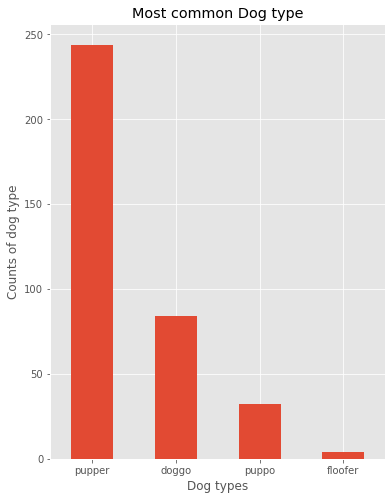

In [263]:
# creating the bar plot
pd.value_counts(twitter.dog_type).plot.bar(rot=0, figsize=(6,8))
plt.xlabel("Dog types")
plt.ylabel("Counts of dog type")
plt.title("Most common Dog type")
plt.show();

Most popular dog type is Pupper

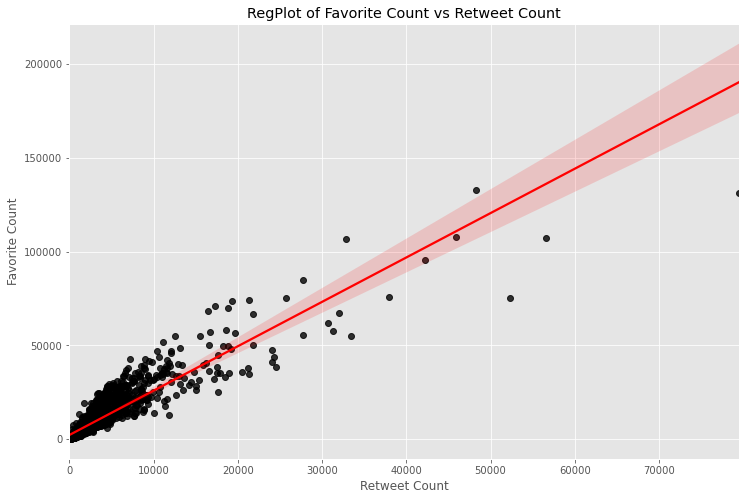

In [264]:
# Regplot with favorite count vs retweet count using seaborn.
favorite = twitter.favorite_count
retweet = twitter.retweet_count

sns.regplot(x=retweet, y=favorite, data=twitter, scatter_kws={'color':'black'}, line_kws={'color':'red'})
plt.title('RegPlot of Favorite Count vs Retweet Count')
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count');

From the above, we can see a positive correlation between the favorite count and retweet count. which implies as retweet increases there is also an increase in favorite count.